In [1]:
import os
import librosa
import pandas as pd
import numpy as np

DATASET_PATH = r"C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset"
CSV_PATH = "ffff.csv"
SAMPLE_RATE = 22050
NUM_MFCC = 13
N_FFT = 2048
HOP_LENGTH = 512


def save_mfcc(dataset_path, csv_path, num_mfcc=NUM_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH):

    data = {
        "filename": [],
        "label": []
    }

    for i in range(1, num_mfcc + 1):
        data[f"mfcc_{i}"] = []

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        if dirpath != dataset_path:
            semantic_label = os.path.basename(dirpath)
            print(f"\nProcessing genre folder: {semantic_label}")

            for f in sorted(filenames):
                file_path = os.path.join(dirpath, f)
                print(f"Loading file: {file_path}")
                
                try:
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                    
                    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, 
                                                n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T  
                    mfcc_mean = np.mean(mfcc, axis=0) 
                    data["filename"].append(file_path)
                    data["label"].append(i - 1)  

                    
                    for j in range(num_mfcc):
                        data[f"mfcc_{j+1}"].append(mfcc_mean[j])

                except Exception as e:
                    print(f"Could not process file {file_path}. Error: {e}")

    df = pd.DataFrame(data)

    try:
        df.to_csv(csv_path, index=False)
        print(f"MFCCs successfully saved to {csv_path}")
    except Exception as e:
        print(f"Could not save data to {csv_path}. Error: {e}")


if __name__ == "__main__":
    save_mfcc(DATASET_PATH, CSV_PATH)



Processing genre folder: Healthy
Loading file: C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset\Healthy\1.wav
Loading file: C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset\Healthy\10.wav
Loading file: C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset\Healthy\100.wav
Loading file: C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset\Healthy\101.wav
Loading file: C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset\Healthy\102.wav
Loading file: C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset\Healthy\103.wav
Loading file: C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset\Healthy\104.wav
Loading file: C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset\Healthy\105.wav
Loading file: C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset\Healthy\106.wav
Loading file: C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset\Healthy\107.wav
Loading file: C:\Users\Megha Mohan\ML Project\Chicken_Audio_Dataset\Healthy\108.wav
Loading file: C:\Users\Megha Mohan\ML Project

In [19]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,Conv2D,MaxPooling1D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
CSV_PATH = "ffff.csv"
df = pd.read_csv(CSV_PATH)

In [4]:
X = df.drop(columns=['filename', 'label']).values
y = df['label'].values

In [5]:
NUM_MFCC = 13
X = X.reshape(len(X), NUM_MFCC, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(NUM_MFCC, 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\Megha Mohan\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test), batch_size=32,callbacks=[early_stopping])

Epoch 1/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8921 - loss: 0.2704 - val_accuracy: 0.9000 - val_loss: 0.2336
Epoch 2/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9005 - loss: 0.3194 - val_accuracy: 0.8571 - val_loss: 0.2544
Epoch 3/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8732 - loss: 0.3406 - val_accuracy: 0.8571 - val_loss: 0.2780
Epoch 4/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8708 - loss: 0.3054 - val_accuracy: 0.9286 - val_loss: 0.2084
Epoch 5/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9104 - loss: 0.2776 - val_accuracy: 0.8857 - val_loss: 0.2422
Epoch 6/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8231 - loss: 0.4347 - val_accuracy: 0.8571 - val_loss: 0.2560
Epoch 7/7
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8524 - loss: 0.3707 - val_accuracy: 0.8571 - val_loss: 0.2393


In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9259 - loss: 0.2485 
Test Accuracy: 0.9142857193946838


In [38]:
model.save("mymodel1.keras")

In [21]:
import tensorflow as tf
new_model = tf.keras.models.load_model('mymodel1.keras')


In [22]:
loss, accuracy = new_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9109 - loss: 0.2529  
Test Accuracy: 0.8999999761581421


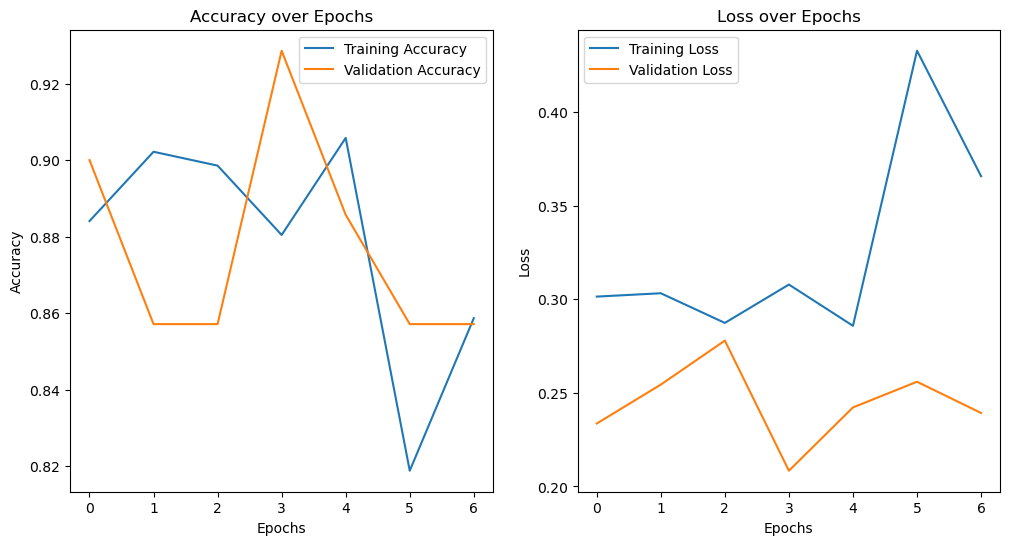

In [33]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit
history = model.history.history

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


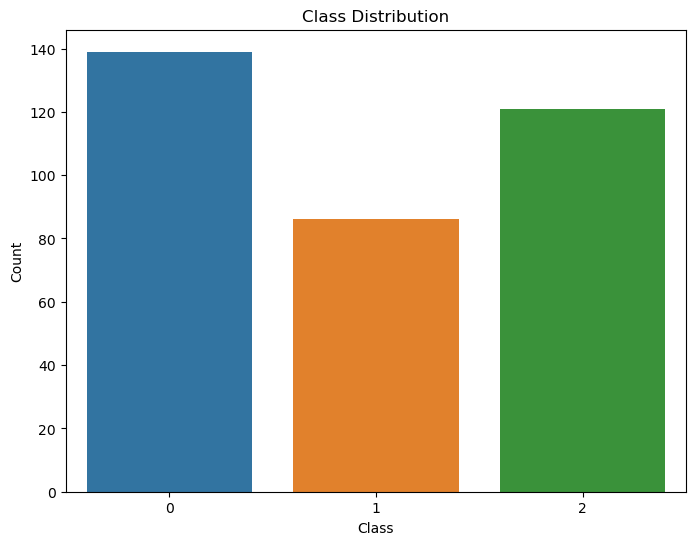

In [25]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

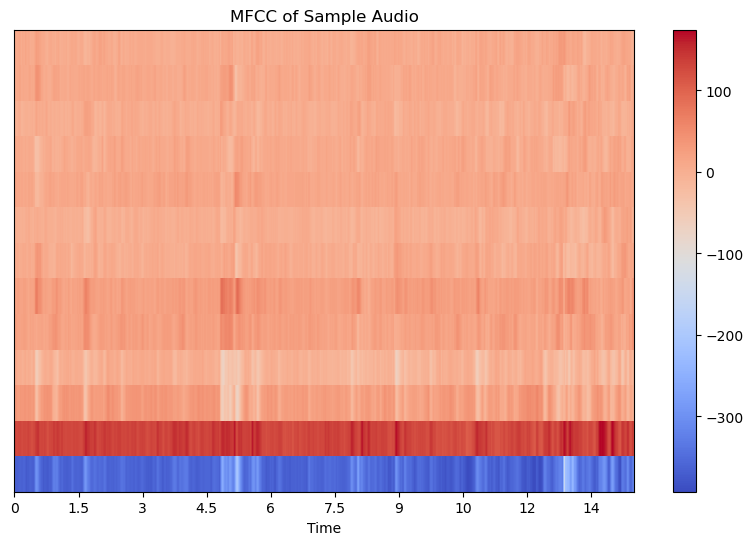

In [29]:
import librosa.display
file_path = df['filename'][0]  
signal, sr = librosa.load(file_path, sr=22050)
mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=NUM_MFCC, n_fft=2048, hop_length=512)

plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC of Sample Audio')
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


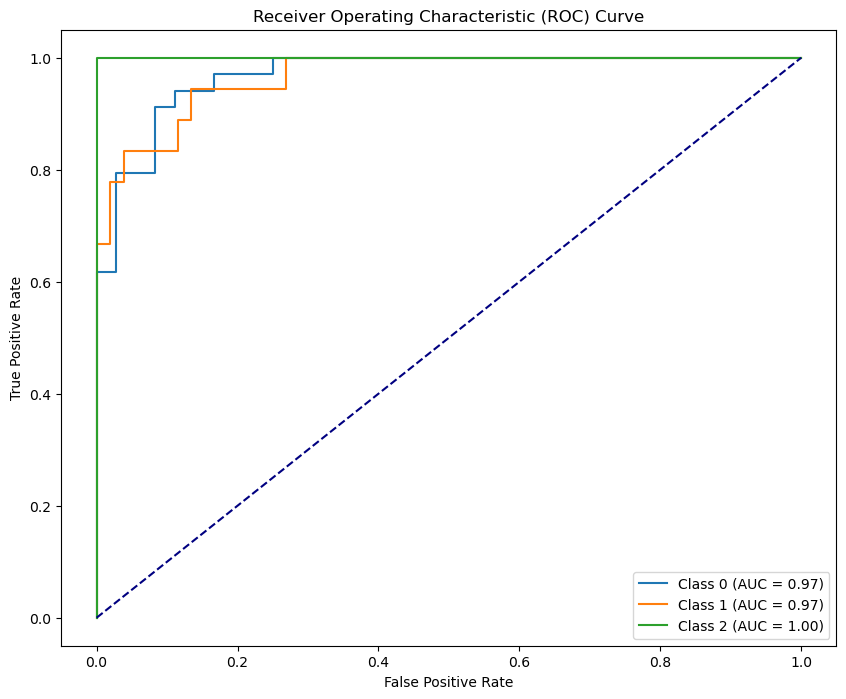

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_bin = new_model.predict(X_test)

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


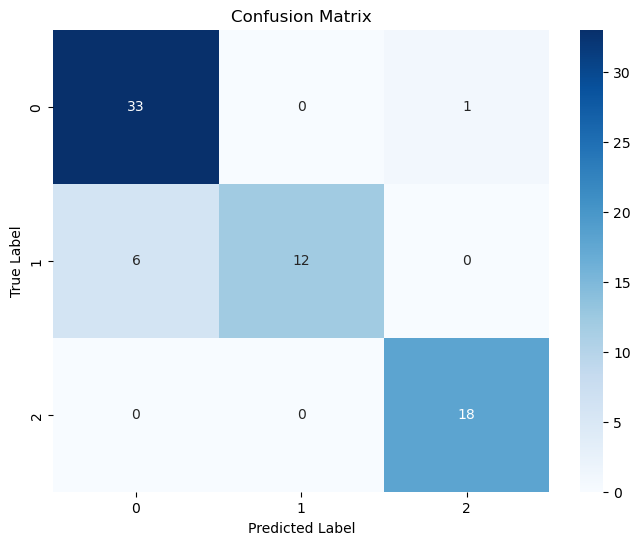

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(new_model.predict(X_test), axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
